# **Data Visualization**

In [1]:
import pandas as pd

df = pd.read_csv('/kaggle/input/news-sentiment-analysis/news_sentiment_analysis.csv')
df.head(5)

,Source,Author,Title,Description,URL,Published At,Sentiment,Type
0,stgnews,Bridger Palmer,Pine View High teacher wins Best in State awar...,"ST. GEORGE — Kaitlyn Larson, a first-year teac...",https://www.stgeorgeutah.com/news/archive/2024...,2024-07-12T23:45:25+00:00,positive,Business
1,Zimbabwe Mail,Staff Reporter,Businesses Face Financial Strain Amid Liquidit...,"Harare, Zimbabwe – Local businesses are grappl...",https://www.thezimbabwemail.com/business/busin...,2024-07-12T22:59:42+00:00,neutral,Business
2,4-traders,NaN,Musk donates to super pac working to elect Tru...,(marketscreener.com) Billionaire Elon Musk has...,https://www.marketscreener.com/business-leader...,2024-07-12T22:52:55+00:00,positive,Business
3,4-traders,NaN,US FTC issues warning to franchisors over unfa...,(marketscreener.com) A U.S. trade regulator on...,https://www.marketscreener.com/quote/stock/MCD...,2024-07-12T22:41:01+00:00,negative,Business
4,PLANET,NaN,Rooftop solar's dark side,4.5 million households in the U.S. have solar ...,https://www.npr.org/2024/07/12/1197961036/roof...,2024-07-12T22:28:19+00:00,positive,Business


In [2]:
df.shape

(3500, 8)

# Sentiment Distribution
Bar chart showing counts of each sentiment

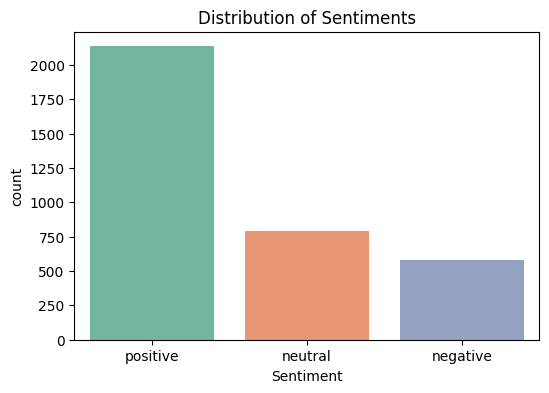

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiments')
plt.show()

# News Category Distribution
Bar or pie chart of news types.

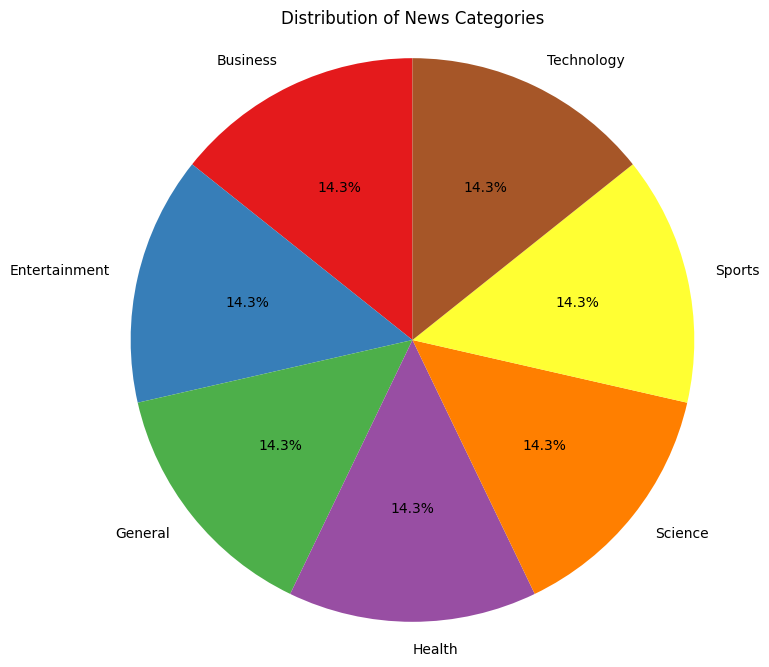

In [4]:
# News category distribution
# Calculate the count of each news category
category_counts = df['Type'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(8,8))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', colors=plt.cm.Set1.colors, startangle=90)
plt.title('Distribution of News Categories')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

# Sentiment by News Category
Grouped bar chart of sentiment distribution per category.

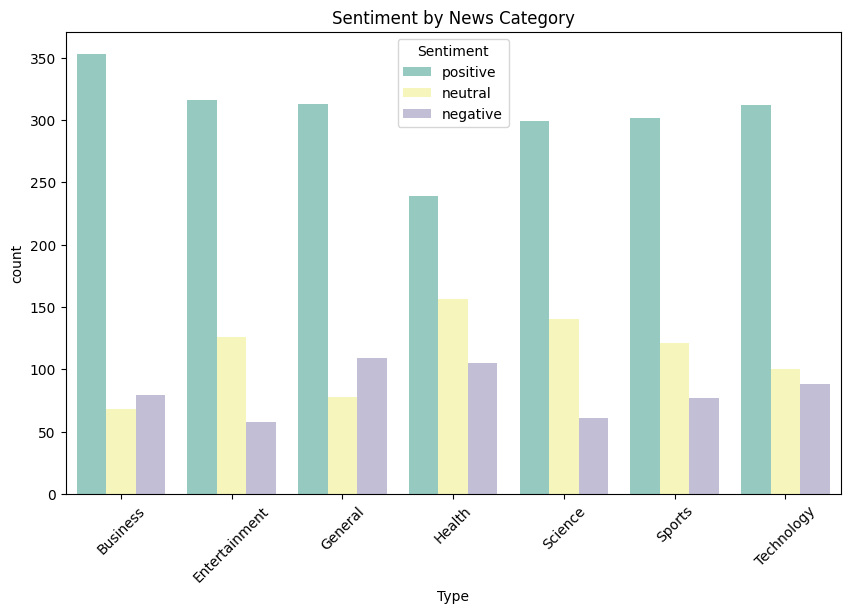

In [5]:
# Sentiment count by news category
plt.figure(figsize=(10,6))
sns.countplot(x='Type', hue='Sentiment', data=df, palette='Set3')
plt.title('Sentiment by News Category')
plt.xticks(rotation=45)
plt.show()


In [40]:
def random_equal_samples(dataframe, category_column, sample_size):
    categories = dataframe[category_column].unique()
    samples_per_category = sample_size // len(categories)

    # Initialize an empty DataFrame to store the sampled data
    sampled_data = pd.DataFrame()

    # Sample an equal number of samples from each category
    for category in categories:
        category_data = dataframe[dataframe[category_column] == category]
        sampled_category = category_data.sample(samples_per_category, replace=True)
        sampled_data = pd.concat([sampled_data, sampled_category], ignore_index=True)

    # Shuffle the DataFrame to randomize the order of samples
    sampled_data = sampled_data.sample(frac=1).reset_index(drop=True)

    return sampled_data


df = random_equal_samples(df, 'Sentiment', 1500)

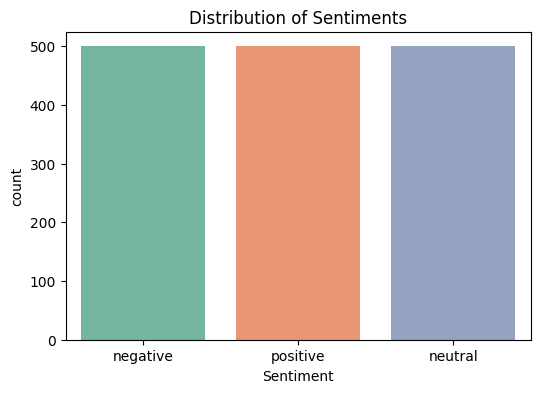

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sentiment distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Sentiment', data=df, palette='Set2')
plt.title('Distribution of Sentiments')
plt.show()

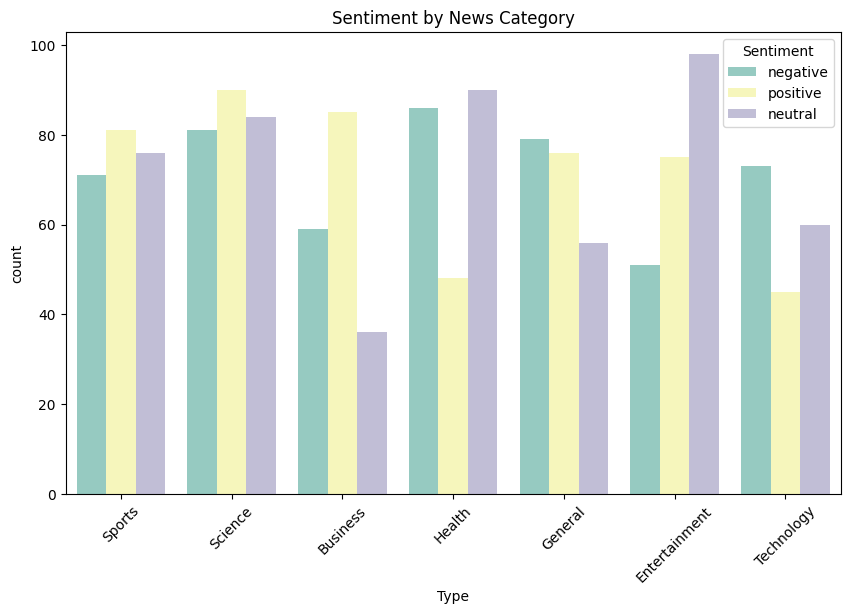

In [42]:
# Sentiment count by news category
plt.figure(figsize=(10,6))
sns.countplot(x='Type', hue='Sentiment', data=df, palette='Set3')
plt.title('Sentiment by News Category')
plt.xticks(rotation=45)
plt.show()


# **Data Preprocessing**

In [43]:
import pandas as pd
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import spacy
nlp = spacy.load("en_core_web_sm")

In [44]:
import re

# Fill NaN values if any (especially for Title, Description)
df.fillna('', inplace=True)

# Function to clean text data
def preprocess_text(text):
    # 1. Convert text to lowercase
    text = text.lower()
    
    # 2. Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # 3. Remove special characters, URLs, and mentions
    text = re.sub(r'http\S+|www\S+|https\S+|@\w+|#\w+', '', text, flags=re.MULTILINE)
    
    # 4. Remove numbers
    text = ''.join([char for char in text if not char.isdigit()])
    
    # 5. Tokenize the text
    tokens = word_tokenize(text)
    
    # 6. Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    
    # 7. Lemmatization using spaCy
    lemmatized_tokens = [token.lemma_ for token in nlp(" ".join(tokens))]
    
    # 8. Stemming using PorterStemmer
    stemmer = PorterStemmer()
    stemmed_tokens = [stemmer.stem(word) for word in lemmatized_tokens]
    
    # 9. Remove short words (length <= 1)
    stemmed_tokens = [word for word in stemmed_tokens if len(word) > 1]
    
    # 10. Return the cleaned text
    return ' '.join(stemmed_tokens)

In [45]:
# Preprocess the 'Title' and 'Description' columns
df['cleaned_title'] = df['Title'].apply(preprocess_text)
df['cleaned_description'] = df['Description'].apply(preprocess_text)

# Combine the title and description
df['combined_text'] = df['cleaned_title'] + ' ' + df['cleaned_description']


In [46]:
# Print first few entries of combined_text
print(df['combined_text'].head(5))

0    watch euro final england vs spain live stream ...
1    tenshi life scienc pte limit sell share kda gr...
2    curat memori seri good spot captur rink market...
3    assur recogn disabilityin good place work disa...
4    antagonist conflict transposonencod intron gui...
Name: combined_text, dtype: object


# Split Data into Training and Testing

In [47]:
from sklearn.model_selection import train_test_split

X = df['combined_text']
y = df['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Data Vectorization

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
import joblib
vectorizer = TfidfVectorizer(max_features=40000)  
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

vectorizer_filename = 'tfidf_vectorizer.joblib'
joblib.dump(vectorizer, vectorizer_filename)

['tfidf_vectorizer.joblib']

# **Data Training**

In [49]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

clf = MultinomialNB()

clf.fit(X_train_vec, y_train)

MultinomialNB()

# **Data Testing**

In [50]:
y_pred = clf.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy: {accuracy*100:.2f}%")

Accuracy: 83.33%


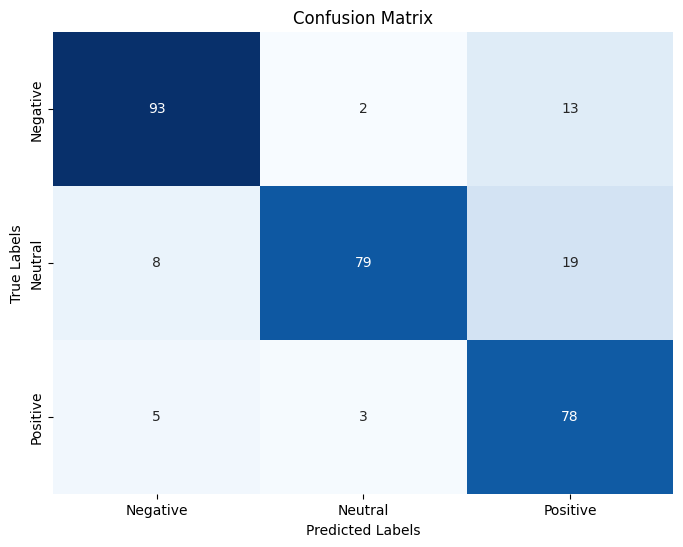

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your true labels and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Neutral', 'Positive'], 
            yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [52]:
from sklearn.metrics import classification_report
# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

    negative       0.88      0.86      0.87       108
     neutral       0.94      0.75      0.83       106
    positive       0.71      0.91      0.80        86

    accuracy                           0.83       300
   macro avg       0.84      0.84      0.83       300
weighted avg       0.85      0.83      0.83       300



In [53]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score


# Save the trained model to a file
model_filename = 'multinomial_nb_model.joblib'
joblib.dump(clf, model_filename)

# Download the saved model file
from IPython.display import FileLink
FileLink(rf'{model_filename}')

/kaggle/working/multinomial_nb_model.joblib